Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 128, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_layer_1               │ (None, 1)              │           193 │
│ (AttentionLayer)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 21)             │         1,365 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,726 (34.09 KB)

 Trainable params: 8,726 (34.09 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.6510 - loss: 1.4950 - val_accuracy: 0.6697 - val_loss: 1.1071
Epoch 2/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6726 - loss: 1.0491 - val_accuracy: 0.6603 - val_loss: 1.1166
Epoch 3/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6828 - loss: 1.0123 - val_accuracy: 0.6612 - val_loss: 1.1121
Epoch 4/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6859 - loss: 0.9898 - val_accuracy: 0.6567 - val_loss: 1.1657
Epoch 5/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6853 - loss: 0.9860 - val_accuracy: 0.6564 - val_loss: 1.1922
Epoch 6/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6860 - loss: 0.9798 - val_accuracy: 0.6540 - val_loss: 1.2348
Epoch 7/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6894 - loss: 0.9681 - val_accuracy: 0.6590 - val_loss: 1.2199
Epoch 8/20
4576/4576 ━━━━━━━━━━━━━━━━━━━━ 24s 5ms/step - accuracy: 0.6884 - loss: 0

C:\Users\azwan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\azwan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\azwan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


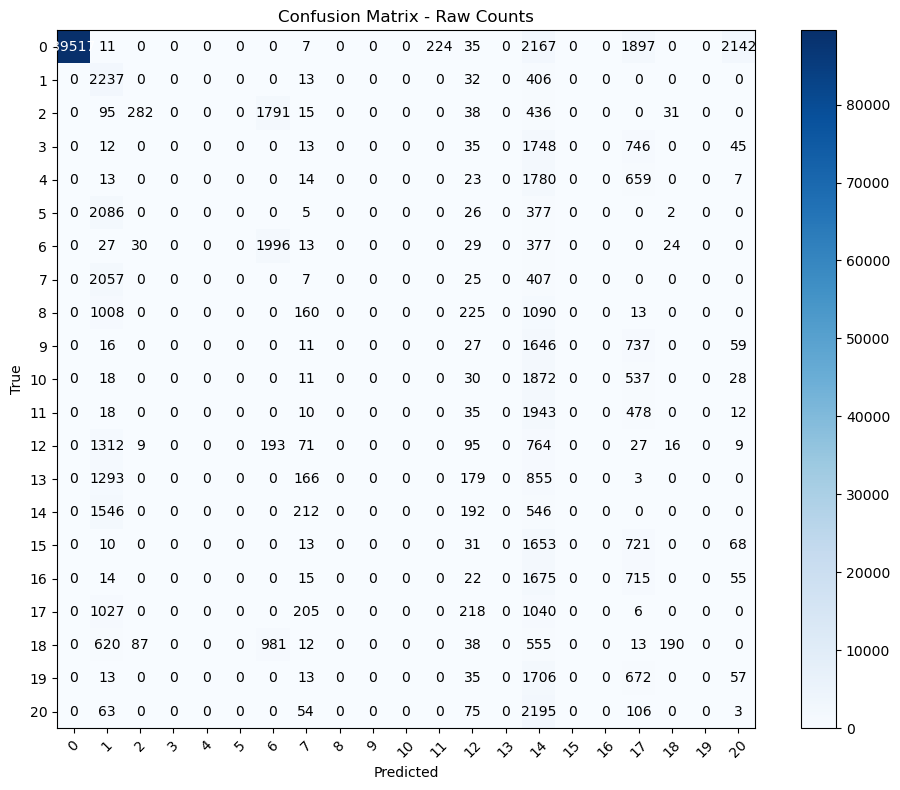

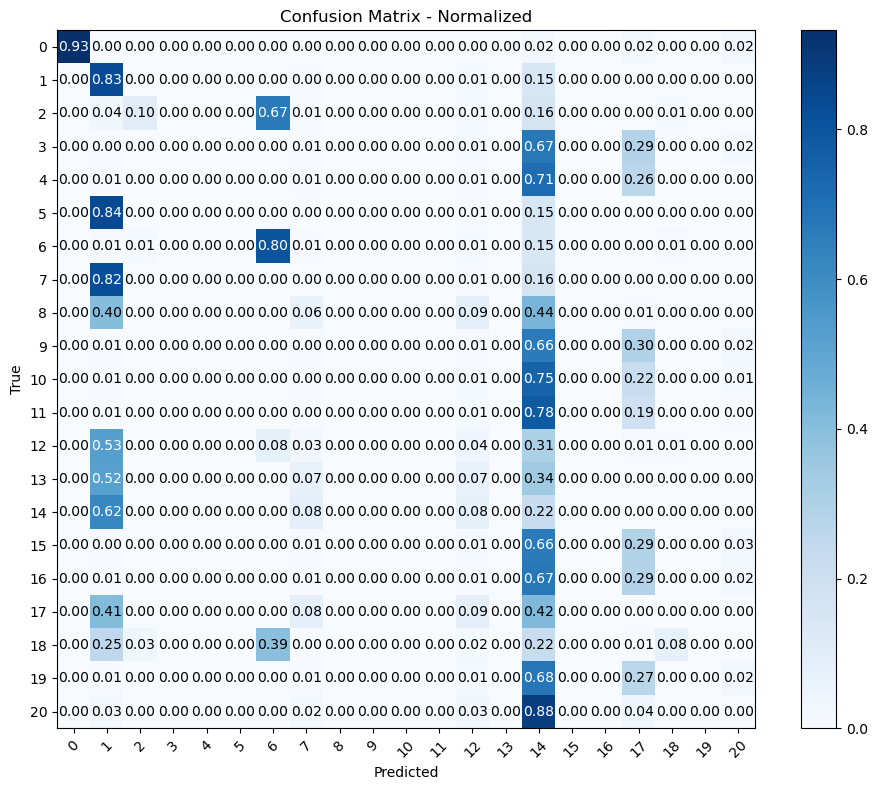

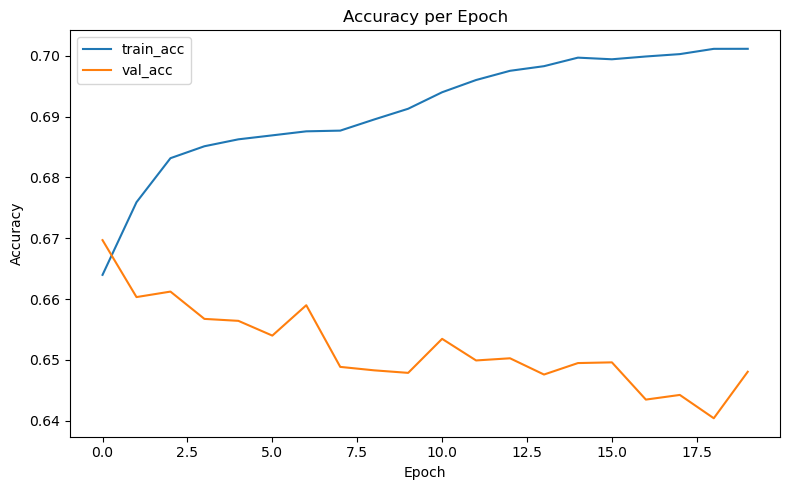

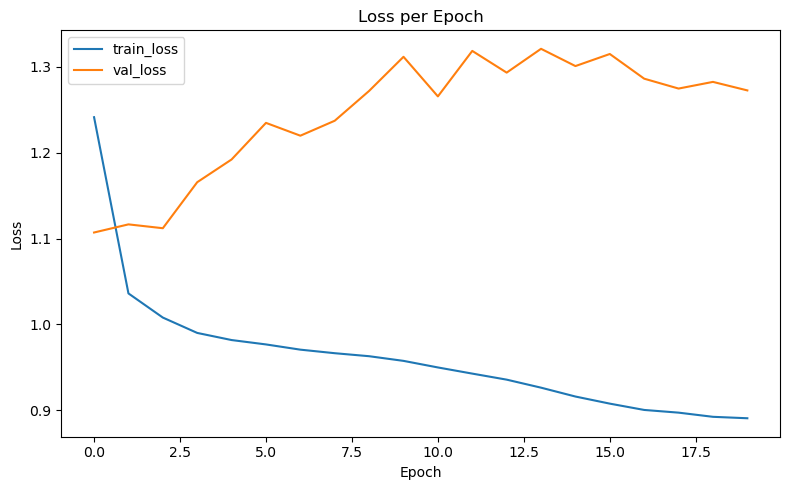

In [3]:
# ---------------------------
# Attention-DNN for TEP Fault Diagnosis (Full Pipeline)
# ---------------------------

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

# ---------------------------
# 1) Load & Prepare Data
# ---------------------------
df_faulty_free = pd.read_csv("FaultFree_Testing.csv")
df_faulty_train = pd.read_csv("Faulty_Testing.csv")

# Label handling
df_faulty_free['faultNumber'] = 0
df_faulty_train['faultNumber'] = df_faulty_train['faultNumber'].fillna(-1)

# Merge
df = pd.concat([df_faulty_free, df_faulty_train]).reset_index(drop=True)

X = df.drop(columns=['faultNumber']).values
y = df['faultNumber'].values.astype(int)

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ---------------------------
# 2) Attention Layer
# ---------------------------
class AttentionLayer(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.W = layers.Dense(units, activation='tanh')
        self.V = layers.Dense(1)

    def call(self, inputs):
        score = self.W(inputs)                           # (batch, steps, units)
        weights = tf.nn.softmax(self.V(score), axis=1)   # (batch, steps, 1)
        context = tf.reduce_sum(weights * inputs, axis=1) # (batch, features)
        return context

# ---------------------------
# 3) Build Model
# ---------------------------
num_classes = len(np.unique(y))
input_dim = X_train.shape[1]

inp = layers.Input(shape=(input_dim,))
h = layers.Dense(128, activation='relu')(inp)
h = layers.Dropout(0.2)(h)
h = layers.Reshape((128, 1))(h)    # treat 128 features as steps
h = AttentionLayer(64)(h)          # (batch, features)
h = layers.Dense(64, activation='relu')(h)
h = layers.Dropout(0.2)(h)
out = layers.Dense(num_classes, activation='softmax')(h)

model = models.Model(inp, out)
model.compile(optimizer=optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ---------------------------
# 4) Train
# ---------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=128,
    verbose=1
)

# ---------------------------
# 5) Evaluate
# ---------------------------
y_prob = model.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)

# Overall Accuracy
overall_acc = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {overall_acc:.4f}")

# Per-class metrics
print("\nClassification Report (per fault class):")
print(classification_report(y_test, y_pred, digits=4))

# ---------------------------
# 6) Confusion Matrix
# ---------------------------
classes = np.unique(y)
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Raw counts
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap="Blues")
plt.title("Confusion Matrix - Raw Counts")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted")
plt.ylabel("True")
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Normalized confusion matrix
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8))
plt.imshow(cm_norm, interpolation='nearest', cmap="Blues")
plt.title("Confusion Matrix - Normalized")
plt.colorbar()
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted")
plt.ylabel("True")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}",
                 ha="center", va="center",
                 color="white" if cm_norm[i, j] > 0.5 else "black")
plt.tight_layout()
plt.show()

# ---------------------------
# 7) Training Curves
# ---------------------------
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()


Class weights: {0: 0.07262239583333334, 1: 2.593656994047619, 2: 2.593656994047619, 3: 2.6827320827320826, 4: 2.7931690705128207, 5: 2.7931690705128207, 6: 2.7931690705128207, 7: 2.7931690705128207, 8: 2.7931690705128207, 9: 2.7931690705128207, 10: 2.7931690705128207, 11: 2.7931690705128207, 12: 2.7931690705128207, 13: 2.7931690705128207, 14: 2.7931690705128207, 15: 2.7931690705128207, 16: 2.7931690705128207, 17: 2.7931690705128207, 18: 2.7931690705128207, 19: 2.7931690705128207, 20: 2.7931690705128207}


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 54)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 54)             │           216 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_attention               │ (None, 54)             │           193 │
│ (FeatureAttention)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │        14,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 21)             │         2,709 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,094 (195.68 KB)

 Trainable params: 49,986 (195.26 KB)

 Non-trainable params: 108 (432.00 B)

Epoch 1/100
2288/2288 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.5375 - loss: 2.0505 - val_accuracy: 0.7784 - val_loss: 0.7464 - learning_rate: 0.0010
Epoch 2/100
2288/2288 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7693 - loss: 1.4718 - val_accuracy: 0.7931 - val_loss: 0.6916 - learning_rate: 0.0010
Epoch 3/100
2288/2288 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7832 - loss: 1.3807 - val_accuracy: 0.7951 - val_loss: 0.7039 - learning_rate: 0.0010
Epoch 4/100
2288/2288 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7875 - loss: 1.3496 - val_accuracy: 0.7960 - val_loss: 0.7027 - learning_rate: 0.0010
Epoch 5/100
2288/2288 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7923 - loss: 1.3181 - val_accuracy: 0.8124 - val_loss: 0.6539 - learning_rate: 0.0010
Epoch 6/100
2288/2288 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8024 - loss: 1.2506 - val_accuracy: 0.8153 - val_loss: 0.6660 - learning_rate: 0.0010
Epoch 7/100
2288/2288 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accura

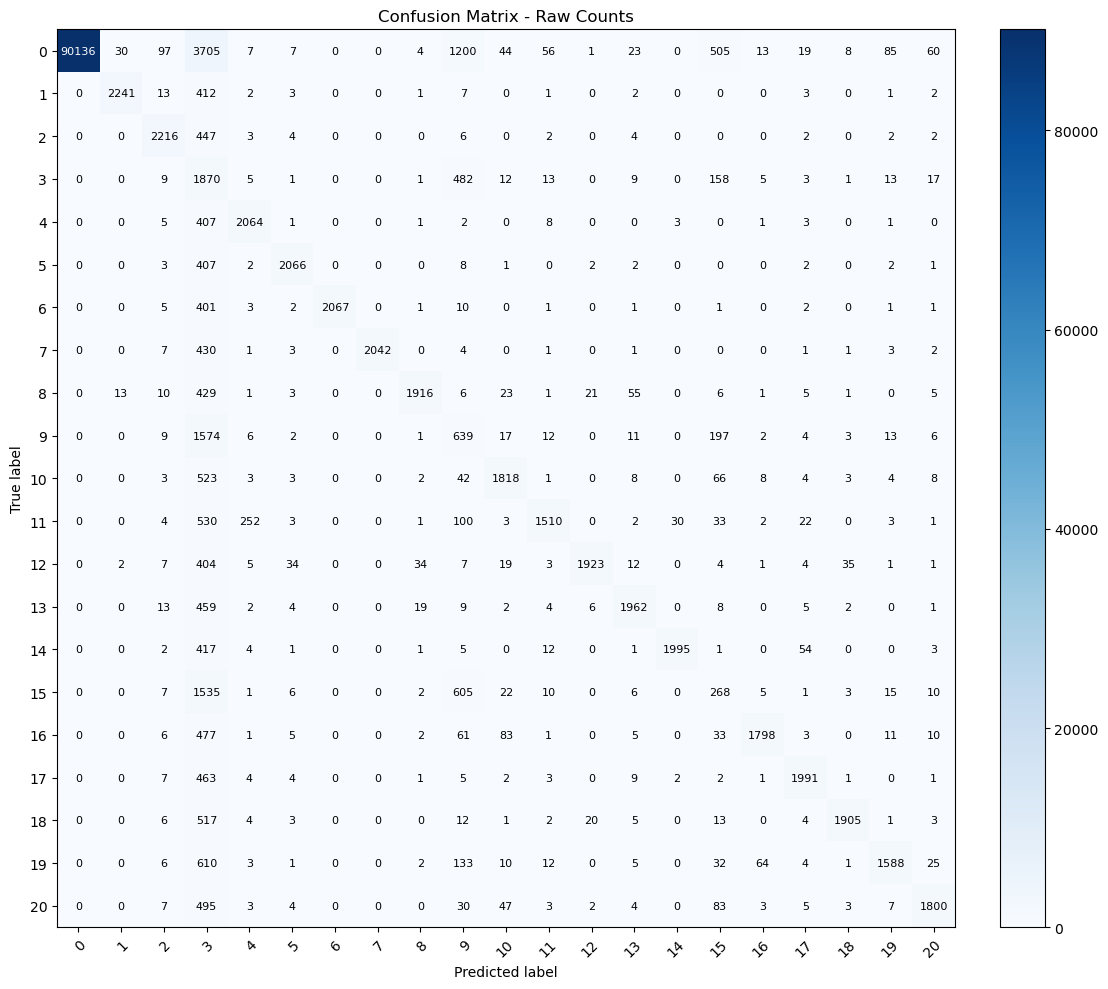

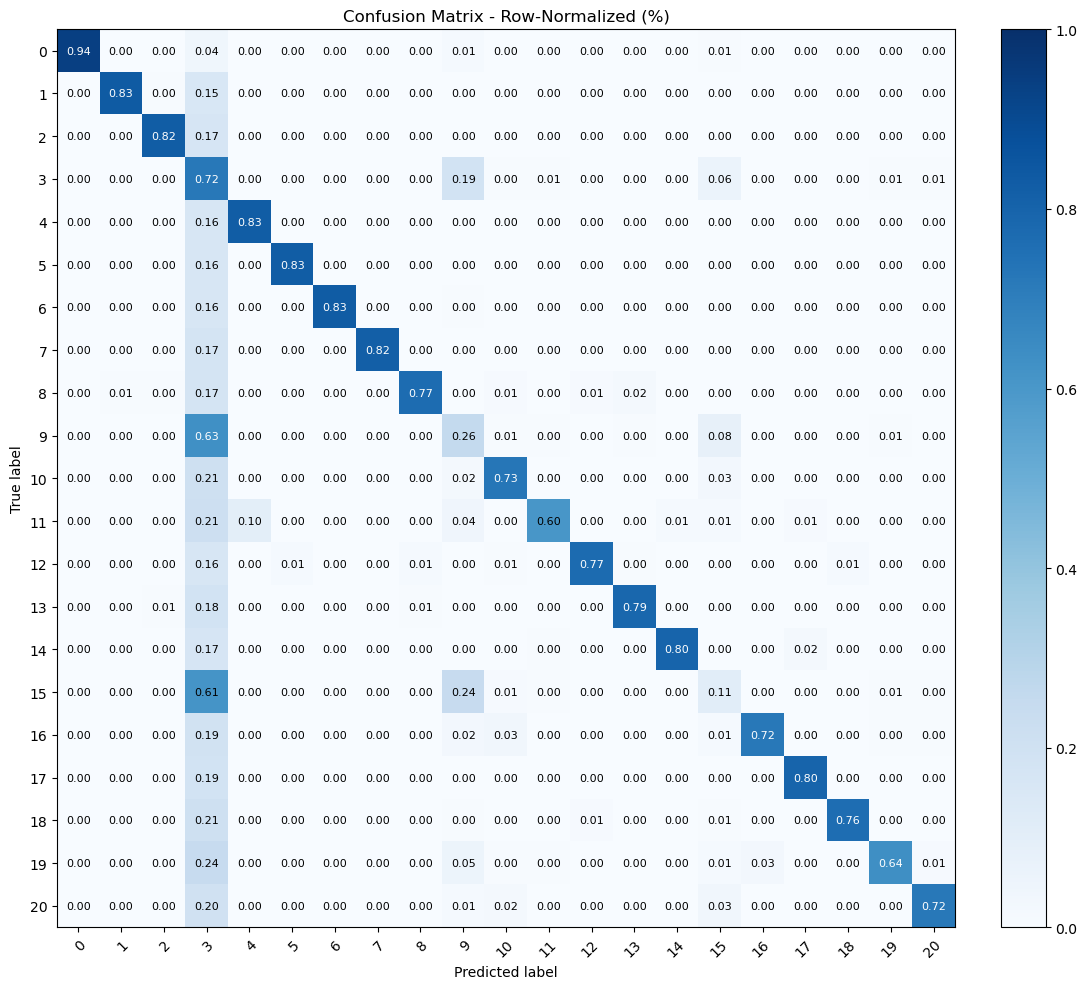

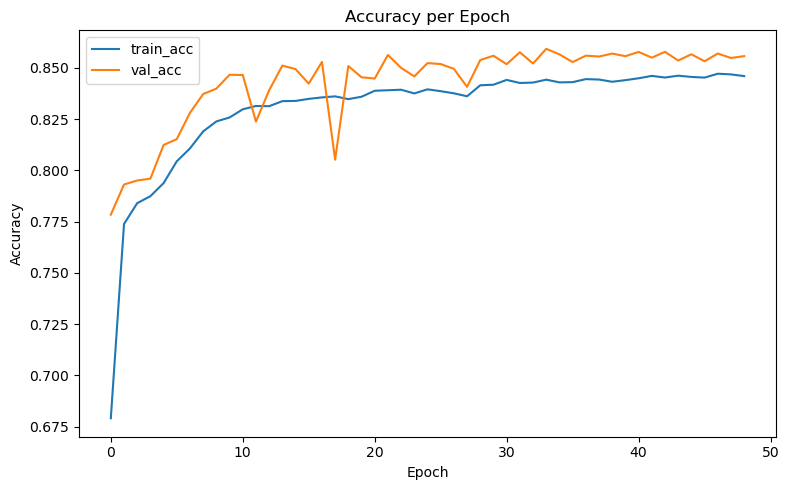

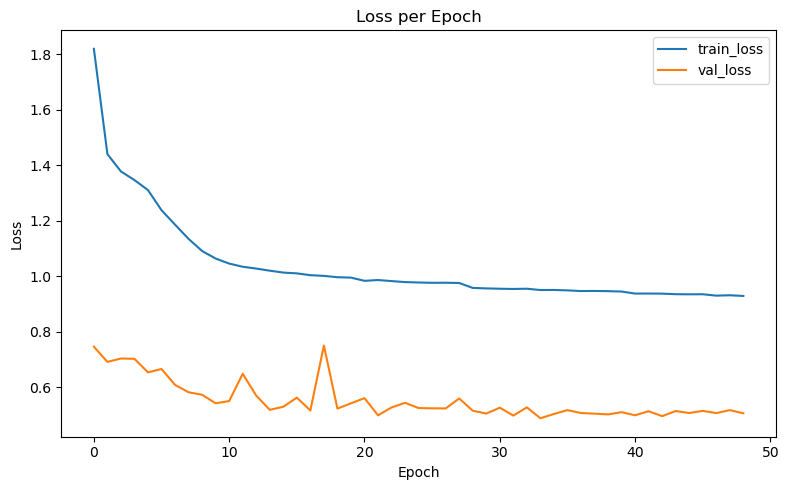

In [5]:
# ===========================
# Attention-DNN (Feature-Attention) on TEP
# - 100 epochs, class weights, LR scheduler, early stopping
# - Clear confusion matrices (normalized + counts)
# - Overall and fault-only metrics
# ===========================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks

# ---------------------------
# 1) Load & prepare data
# ---------------------------
df_faulty_free = pd.read_csv("FaultFree_Testing.csv")
df_faulty_train = pd.read_csv("Faulty_Testing.csv")

df_faulty_free['faultNumber'] = 0
df_faulty_train['faultNumber'] = df_faulty_train['faultNumber'].fillna(-1)  # keep if present

df = pd.concat([df_faulty_free, df_faulty_train]).reset_index(drop=True)

X = df.drop(columns=['faultNumber']).values
y = df['faultNumber'].values.astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

classes = np.unique(y_train)
num_classes = len(classes)
input_dim = X_train.shape[1]

# Compute class weights to fight imbalance (maps label -> weight)
cw_values = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = {int(c): float(w) for c, w in zip(classes, cw_values)}
print("Class weights:", class_weights)

# ---------------------------
# 2) Feature-Attention layer
#    Attends over original feature dimensions and returns weighted features
# ---------------------------
class FeatureAttention(layers.Layer):
    def __init__(self, units=64):
        super().__init__()
        self.W = layers.Dense(units, activation='tanh')
        self.V = layers.Dense(1)

    def call(self, inputs):
        # inputs: (batch, features)
        x = tf.expand_dims(inputs, axis=-1)                  # (batch, features, 1)
        score = self.W(x)                                    # (batch, features, units)
        weights = tf.nn.softmax(self.V(score), axis=1)       # (batch, features, 1)
        attended = tf.squeeze(weights * x, axis=-1)          # (batch, features)  (feature-wise reweight)
        return attended

# ---------------------------
# 3) Build model
# ---------------------------
inp = layers.Input(shape=(input_dim,))
x = layers.BatchNormalization()(inp)
x = FeatureAttention(64)(x)                  # feature-wise attention
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5))(x)
x = layers.Dropout(0.3)(x)
out = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inp, out)
model.compile(optimizer=optimizers.Adam(1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# ---------------------------
# 4) Train (100 epochs) with callbacks
# ---------------------------
cb = [
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-6, verbose=1),
    callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=256,
    class_weight=class_weights,
    callbacks=cb,
    verbose=1
)

# ---------------------------
# 5) Evaluate
# ---------------------------
y_prob = model.predict(X_test, verbose=0)
y_pred = y_prob.argmax(axis=1)

overall_acc = accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {overall_acc:.4f}")

print("\nClassification Report (all classes):")
print(classification_report(y_test, y_pred, labels=classes, digits=4))

# Fault-only view (exclude class 0 if present)
fault_classes = [c for c in classes if c != 0]
if len(fault_classes) > 0:
    print("\nClassification Report (fault classes only, excludes normal=0):")
    print(classification_report(y_test, y_pred, labels=fault_classes, digits=4))

# ---------------------------
# 6) Confusion matrices (improved clarity)
# ---------------------------
def plot_confusion(cm, labels, title="Confusion Matrix", normalize=False):
    if normalize:
        cm = cm.astype("float")
        row_sums = cm.sum(axis=1, keepdims=True)
        # avoid division-by-zero for empty rows
        row_sums[row_sums == 0] = 1.0
        cm = cm / row_sums

    fig, ax = plt.subplots(figsize=(12, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues', vmin=0, vmax=(1.0 if normalize else None))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.set(
        xticks=np.arange(len(labels)),
        yticks=np.arange(len(labels)),
        xticklabels=labels,
        yticklabels=labels,
        ylabel='True label',
        xlabel='Predicted label',
        title=title
    )
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

    # Annotate cells
    fmt = ".2f" if normalize else "d"
    thresh = (cm.max() / 1.5) if cm.size else 0.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = format(cm[i, j], fmt)
            ax.text(j, i, val, ha="center", va="center",
                    fontsize=8,
                    color="white" if cm[i, j] > thresh else "black")
    ax.grid(False)
    fig.tight_layout()
    plt.show()

cm = confusion_matrix(y_test, y_pred, labels=classes)
plot_confusion(cm, labels=classes, title="Confusion Matrix - Raw Counts", normalize=False)
plot_confusion(cm, labels=classes, title="Confusion Matrix - Row-Normalized (%)", normalize=True)

# ---------------------------
# 7) Training curves
# ---------------------------
plt.figure(figsize=(8, 5))
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()
